In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

###### Merge 12 Months Tables into one Table 

In [2]:
files = [file for file in os.listdir('Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data , df])
all_months_data.to_csv('all_data.csv',index=False)

In [3]:
df = pd.read_csv("all_data.csv")
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [4]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### rename the columns name

In [5]:
df.rename(columns = {'Order ID':'Order_ID',
                     'Quantity Ordered':'Quantity_Ordered',
                     'Price Each':'Price_Each',
                     'Order Date':'Order_Date',
                     'Purchase Address':'Purchase_Address'},inplace=True)

In [6]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

#### convert and transform datatypes

- let's check about nan values in our columns

In [7]:
df.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [10]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [12]:
df.head(1)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [13]:
df['month'] = df['Order_Date'].str[0:2]

In [16]:
df[df['Order_Date'].str[0:2] == 'Or']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [17]:
df = df[df['Order_Date'].str[0:2] != 'Or']

In [18]:
df['month'] = df['month'].astype('int32')

##### Test

In [19]:
df['month'].dtypes

dtype('int32')

> The Question is what is the month that sales are the best?

In [15]:
df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9


- Let's create new column called sales 

In [20]:
df['Price_Each'].dtypes

dtype('O')

In [21]:
df['Price_Each'] = df['Price_Each'].astype(float)

In [22]:
df['Price_Each'].dtypes

dtype('float64')

In [23]:
df['Quantity_Ordered'].dtypes

dtype('O')

In [24]:
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(int)

In [25]:
df['Quantity_Ordered'].dtypes

dtype('int32')

In [26]:
df['sales'] = df['Quantity_Ordered'] * df['Price_Each']

In [27]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [28]:
df_sales = df.groupby('month').sum()['sales']
#df_sales
pd.DataFrame(df_sales)

,sales
month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


- The best Sales was happend in 12 = 4.613443

In [29]:
df_sales = df.groupby('month').sum()['sales'].max()
df_sales

4613443.340001534

Text(0, 0.5, 'Sales')

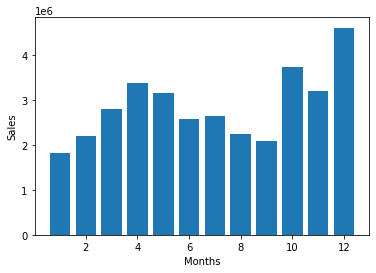

In [30]:
Result  = df.groupby('month').sum()
months  = range(1,13)

plt.bar(months ,Result['sales']);
plt.xlabel('Months')
plt.ylabel('Sales')

### What is the city have a higher number in sales ?

- Let's add a new column called City

In [31]:
df.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [32]:
df['city'] = df['Purchase_Address'].apply(lambda x:x.split(',')[1])

In [33]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


- anthor way to do that

In [34]:
def get_city(address):
    return address.split(',')[1]
df['Purchase_Address'].apply(lambda x:get_city(x))

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase_Address, Length: 185950, dtype: object

In [35]:
city = df.groupby('city').sum()['sales']
pd.DataFrame(city)

,sales
city,
Atlanta,2.795499e+06
Austin,1.819582e+06
Boston,3.661642e+06
Dallas,2.767975e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Portland,2.320491e+06
San Francisco,8.262204e+06
Seattle,2.747755e+06


- San Francisco is the best sales 

In [36]:
df.groupby('city').sum()['sales'].max()

8262203.910004012

In [37]:
Result  = df.groupby('city').sum()
#cities  = df.city.unique()
cities  = [city for city,df in df.groupby('city')]

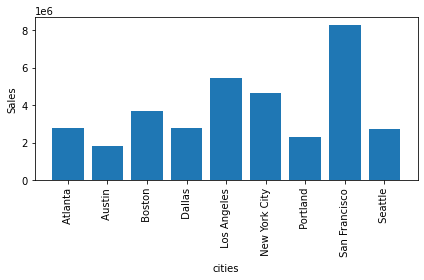

In [38]:
plt.bar(cities ,Result['sales']);
plt.xticks(cities,rotation = 'vertical')
plt.xlabel('cities');
plt.ylabel('Sales');
plt.tight_layout()

#### what time should we display advertisment to maxmize of customers buying products? 

In [39]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [40]:
df['Order_Date'].dtypes

dtype('O')

In [41]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [42]:
df['hour'] = df['Order_Date'].dt.hour

In [43]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [49]:
df_hour = df.groupby('hour').sum()['sales'].sort_values(ascending = False).head(1)
pd.DataFrame(df_hour)

,sales
hour,
19,2412938.54


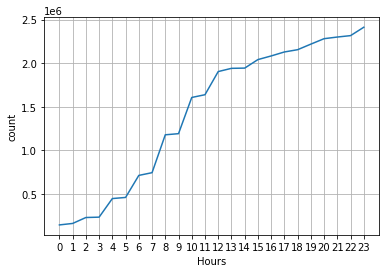

In [51]:
hours = [hour for hour,df in df.groupby('hour')]
plt.plot(hours , df.groupby('hour').sum()['sales'].sort_values(ascending = True))
plt.grid()
plt.xticks(hours);
plt.xlabel('Hours');
plt.ylabel('count');

In [52]:
hours = [hour for hour,df in df.groupby('hour')]

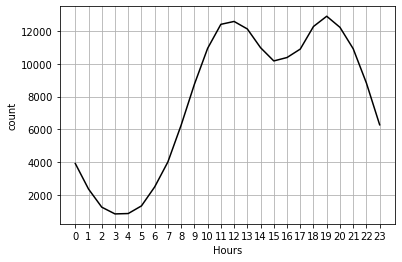

In [56]:
plt.plot(hours, df.groupby('hour').count()['Order_Date'],color = 'black');
plt.grid()
plt.xticks(hours);
plt.xlabel('Hours');
plt.ylabel('count');
#plt.plot(hours, df.groupby('hour').count(),color = 'black');

#### what products are most often soild? 

In [50]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales,city,hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [57]:
df.Product.value_counts().sort_values(ascending = False).head(1)

USB-C Charging Cable    21903
Name: Product, dtype: int64

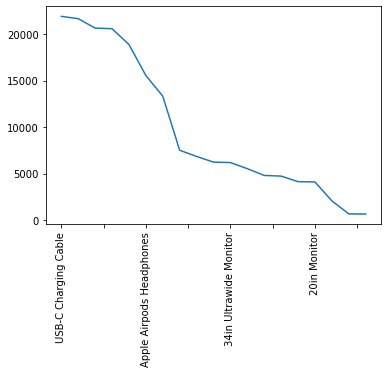

In [58]:
df.Product.value_counts().sort_values(ascending = False).plot();
plt.xticks(rotation = 'vertical');


#### what products are most often soild together? 

In [53]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales,city,hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [70]:
New_Data = df[df['Order_ID'].duplicated(keep=False)]

In [71]:
df['grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x:','.join(x))

In [72]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,month,sales,city,hour,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,Wired Headphones


### What product sold the most ?

In [73]:
df.groupby('Product').sum()['Quantity_Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity_Ordered, dtype: int32

In [75]:
df.groupby('Product').sum()['Quantity_Ordered'].sort_values(ascending = False).head(1)

Product
AAA Batteries (4-pack)    31017
Name: Quantity_Ordered, dtype: int32

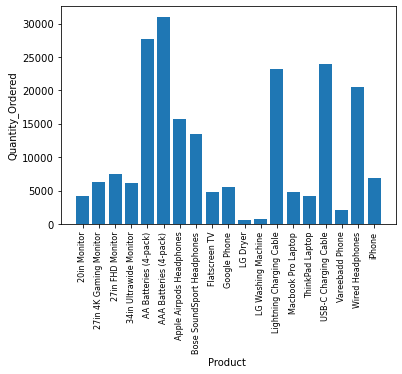

In [77]:


product_group=df.groupby('Product')
quantity_ordered=product_group.sum()['Quantity_Ordered']

products=[product for product ,df_o in product_group ]

plt.bar(products,quantity_ordered )

plt.xticks(products, rotation='vertical',size =8)

plt.ylabel('Quantity_Ordered')
plt.xlabel('Product ')
plt.show()



In [78]:
df.groupby('Product').mean()['Price_Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64

<ipython-input-60-7ec30bc3e734>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


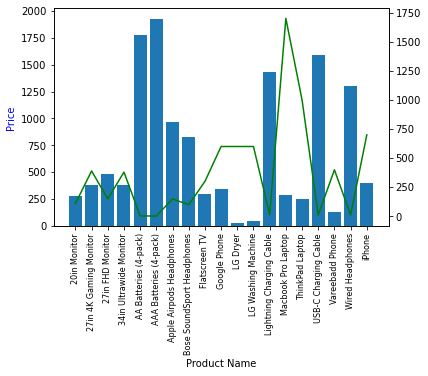

In [60]:
prices=df.groupby('Product').mean()['Price_Each']

fig , ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices ,'b-', color='green')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered ', color='g')
ax1.set_ylabel('Price ', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()


